# Counting
Basically means tracking the frequency of things.  
A hash map opens the door to solving problems where the constraint involves multiple elements.

### Example 1
You are given a string s and an integer k. Find the length of the longest substring that contains at most k distinct characters.

For example, given s = "eceba" and k = 2, return 3. The longest substring with at most 2 distinct characters is "ece".

#### Solution:
Use a hashmap `counts` to check how many distinct character are in the window. Therefore, will map letter to their frequency. The size of the `counts` at any time is the number of distinct characters.  
When remove the element on the left, that is when the window slides, decrement the frquency of the elements being removed. When frequency == 0, this character is no longer part of the window, and can safely delete the key.

#### Time Complexity:
Time Complexity: O(n), where the work inside is amoritized constant as O(1)  
Space Complexity: Occupy O(k) space

In [ ]:
int findLongestSubstring(string s, int k) {
    unordered_map<string, int> counts;
    int ans = 0;
    int left = 0;
    for (int right = 0; right < s.size(); right++) {
        counts[s[right]] += 1;
        while (counts.size() > k) {
            counts[s[left]] -= 1;
            if (counts[s[left]] == 0) {
                counts.erase([s[left]]);
            }
            left++;
        }
        ans = max(ans, right - left + 1);
    }
    return ans;
}

In [ ]:
from collections import defaultdict

def find_longest_substring(s: str, k: int) -> int:
    counts = defaultdict(int)
    left = ans = 0
    for right in range(len(s)):
        counts[s[right]] += 1
        # while there are more distinct elements than required
        while len(counts) > k:
            counts[s[left]] -= 1
            if counts[s[left]] == 0:
                del counts[s[left]]
            left += 1
        # max (ans vs. window size)
        ans = max(ans, right - left + 1)
    return ans


In [ ]:
public int findLongestSubstring(String s, int k) {
    Map<Character, Integer> counts = new HashMap<>();
    int left = 0;
    int ans = 0;

    for (int right = 0; right < s.length(); right++) {
        char c = s.charAt(right);
        counts.put(c, counts.getOrDefault(c, 0) + 1);
        while (counts.size() > k) {
            char remove = s.charAt(left);
            counts.put(remove, counts.getOrDefault(remove, 0) - 1);
            if (counts.get(remove) == 0) {
                counts.remove(remove);
            }

            left++;
        }

        ans = Math.max(ans, right - left + 1);
    }

    return ans;
}

### Example 2 (Question 2248)
Given a 2D array nums that contains n arrays of distinct integers, return a sorted array containing all the numbers that appear in all n arrays.

For example, given nums = [[3,1,2,4,5],[1,2,3,4],[3,4,5,6]], return [3, 4]. 3 and 4 are the only numbers that are in all arrays.

Let's use a hash map counts to count the frequency of elements. We iterate over each of the inner arrays and update counts with every element. After going through all the arrays, we can iterate over our hash map to see which numbers appear n times.

#### Discussion: why not use array?
Think about the case where there's a test case that has `[1, 2, 3, 1000]`, it's required to initialized array with size of 1001 to keep track of data, and nearly all of the indices will be unused.  

A hash map is much safer. Even if 99999999999 is in the input, it doesn't matter - the hash map handles it like any other element.

### Example 3 (Question 1941)
Given a string s, determine if all characters have the same frequency.

For example, given s = "abacbc", return true, because all characters appear twice. Given s = "aaabb", return false. "a" appears 3 times, "b" appears 2 times. 3 != 2.

## Count the number of subarrays with an "exact" constraint
For example, "Find the number of subarrays that have a sum less than k" with an input that only has positive numbers would be solved with sliding window. In this section, we would be talking about questions like "Find the number of subarrays that have a sum exactly equal to k".

### Algorithm
The sum of any subarray can be found as the difference between two prefix sums. **Let's say that you wanted to find subarrays that had a sum exactly equal to `k`**, and you also had a prefix sum array of the input. You know that any difference in the prefix sum array equal to `k` represents a subarray with a sum equal to k. So how do we find these differences?

Declare a hashmap `counts` to keep track how often does the sum occur  
Initialize `counts[0] = 1`, because empty prefix has sum of 0.

Iterate over and maintain the current sum as `curr`. At any given time, `curr` is the sum of the element iterated so far.  
Also at the same time maintaining `counts` by incrementing the frequency of `curr` at each iteration.

The difference between any 2 prefix sum is the subarray. For example, if wanted the subarray starting at index 3 and ending at index 8, then use `prefix[8] - prefix[3 - 1]`. Therefore:
- The sum of the prefix up to `i`, the current iterator, is `curr`.
- The sum of subarray from `j` to `i` is `k`.

---Prefix sum info ends.---  
Therefore the sum of the prefix ending at `j - 1` must be `curr - k`.  
That is, `curr = sum = (prefix sum until j - 1) + k`


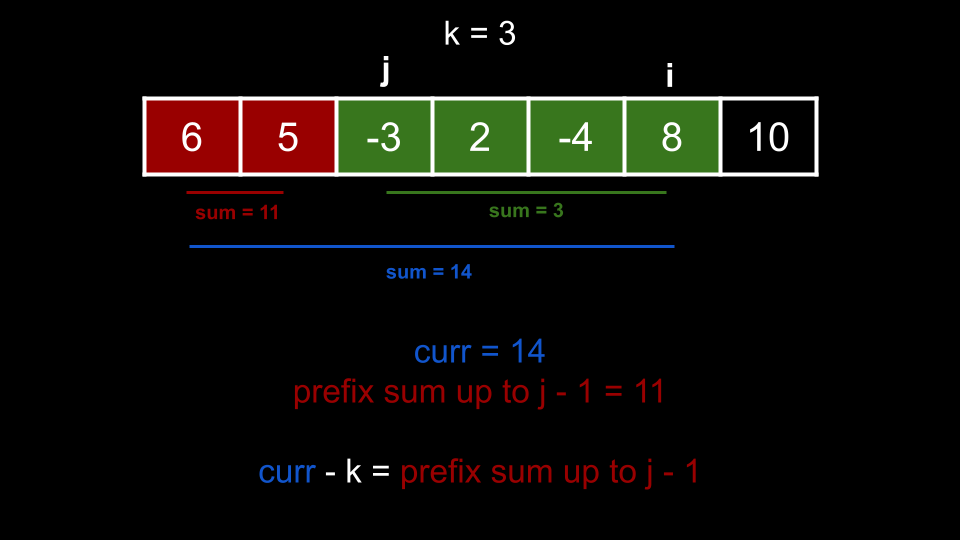

- In this image, the subarray between `j` and `i` has a sum of `k`. The sum of the prefix ending at `i` is 14 (which we keep track of in curr).
- At some point earlier, `curr` was equal to 11 (the prefix ending before j). This is equal to `curr - k`.

**This is the key idea:** if we saw the prefix sum `curr - k` before, it necessarily implies that there is a subarray ending at `i` with a sum of `k`. We don't know where the beginning of this subarray is; we just know it exists, but that's enough to solve the problem.  

Therefore, we can increment our answer by counts[curr - k]. If the prefix curr - k occurred multiple times before (due to negative numbers or zero), then each of those prefixes could be used as a starting point to form a subarray ending at the current index with a sum of k. That's why we need to track the frequency.

#### Example:
`nums = [0, 1, 2, 3, 4]`, `k = 5`  

When `i = 3`:  
`curr = 6` -> 1 + 2 + 3
`counts.size() = 3` -> `counts[0]`, `counts[1]`, `counts[3]`

there is a subarray ending at i with a sum of k - it's [2, 3].

The current prefix sum is 6 (`curr = 6`). We want a subarray with a sum of 5 (target = 5). Note that if there's a prefix sum of `1`, that is one of the key = 1, then could just subtract that prefix sum from the current one and get a subarray of 5. In this case, we have a prefix `[0, 1]` which has sum == 1, and remove that subarray gives us `[2, 3]`.

Remember in #1: Two sum we use current number `num` and searched for `target - num`. Here we use `curr` and search for `curr - k`, because `curr - (curr - k) = k`.

### Example 4 (Question 560)

### Intuition
curr -> current sum iterator  
k -> target  
curr - k -> check if the previous sum existed  

### Algorithm
Given an integer array nums and an integer k, find the number of subarrays whose sum is equal to k.

Let's walk through an example to see why the algorithm described above works for this problem. Let's say we have nums = [1, 2, 1, 2, 1], k = 3. There are four subarrays with sum 3: [1, 2] twice and [2, 1] twice.

The prefix for this input is what `curr` represents during the iteration: [1, 3, 4, 6, 7]. There are 3 differences in this array that has k = 3: 4 - 1, 6 - 3, 7 - 4.

Empty subarray has value of 1. Therefore `count[0] = 1`


### Discussion: why we couldn't use set?
A set can only tell you if a value has been seen before. But we need more than that. When there are non-positive numbers in the input, the same prefix can occur multiple times, and a hash map is needed to count the frequency.

With a hash map (counts[prefix_sum]), you can:
- Count how many times each prefix sum appears
- For each new curr, do ans += counts[curr - k] to add all matching subarrays

### Example 5 (Question 1248)
